In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


## Median Home Value
---

<AxesSubplot:title={'center':'Median Value of Owner Occupied Homes'}, xlabel='Median Home Value ($100k)'>

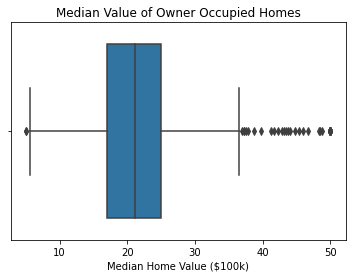

In [28]:
ax = sns.boxplot(x = 'MEDV', data = boston_df)
ax.set(xlabel = 'Median Home Value ($1000s)',
      title = "Median Value of Owner Occupied Homes")
ax

Findings: The median home value is just over $20k with outlier into the 50k range.

## Histogram of Charles River Variable
---

<AxesSubplot:title={'center':'Distribution of Houses along Charles River'}, xlabel='0 = not on river, 1 on river'>

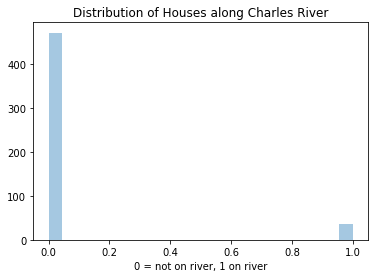

In [16]:
ax = sns.distplot(boston_df['CHAS'], kde = False)
ax.set(title = 'Distribution of Houses along Charles River',
      xlabel = '0 = not on river, 1 on river')
ax

Findings: Most homes are not on the Charles river.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:title={'center':'Boxplot of Median Home Value by Age'}, xlabel='age_group', ylabel='Median Home Value'>

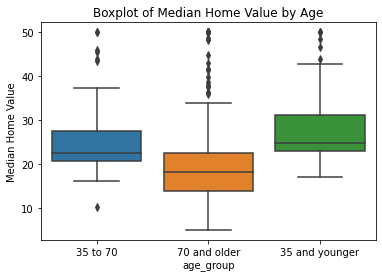

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = "35 to 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = "70 and older"

ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
ax.set(title = "Boxplot of Median Home Value by Age",
      ylabel = "Median Home Value")
ax

Findings: The newer homes have a higher median value, followed by the middle range, and the oldest homes have tghe loweset median value. Despite the trends of the median value there are outliers in each group that extent toward the 50k dollar mark.

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:title={'center':'Relationship between NOX non-retail business'}, xlabel='Proportion of non-retail business per acre', ylabel='Nitric Oxide level'>

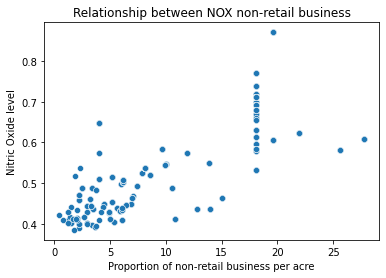

In [26]:
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
ax.set(title = "Relationship between NOX non-retail business",
      ylabel = "Nitric Oxide level",
      xlabel = "Proportion of non-retail business per acre")
ax

Findings: There appears to be a slight positive correlation.

Create a histogram for the pupil to teacher ratio variable

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Student to Teacher Ratio'}, xlabel='Student to Teacher Ratio'>

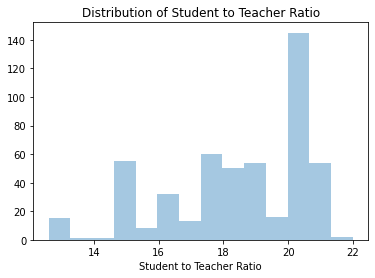

In [29]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
ax.set(title = "Distribution of Student to Teacher Ratio",
      xlabel = "Student to Teacher Ratio")
ax

Findings: A high student to teacher ratio is most common.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [32]:
# check for equal variance
stats.levene(boston_df['MEDV'],
            boston_df['CHAS'],
            center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [33]:
#h0 = no difference between homes on and not on river
stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'], equal_var = True)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Findings: Reject null hypothesis, there is a statistically significant difference between median home values bounded by the Charles river and those that are not.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [36]:
# check variance
stats.levene(boston_df[boston_df['age_group'] == "35 and younger"]["MEDV"],
            boston_df[boston_df['age_group'] == "35 to 70"]["MEDV"],
            boston_df[boston_df['age_group'] == "70 and older"]["MEDV"],
            center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [37]:
# pvalue is not significant, variance is not equal
# anova test
# H0 = no difference between means

younger = boston_df[boston_df['age_group'] == "35 and younger"]["MEDV"]
middle = boston_df[boston_df['age_group'] == "35 to 70"]["MEDV"]
older = boston_df[boston_df['age_group'] == "70 and older"]["MEDV"]
stats.f_oneway(younger, middle, older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Findings: pvalue is siginificant so we reject the null hypothesis. There is a difference between the means of the 3 categories of home age.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [39]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Findings: The pvalue is significant and there is a strong positive correlation of 0.76.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [40]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predict = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        21:58:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Findings: The additional weighted distance to employment centers, on average, increases the median home value by 1.0916 for every one unit of distance increased.